In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Here I lood the image in it's original form and because

In [ ]:
image = cv2.imread('tf2_engineer.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#usually I use to load it using the "imshow, cv.waitKey(0)" but in google collab it is done  using the method above
#sp through out this exercise I will be using just this method to load the images

I also I convert the image from BGR to RGB for displaying with matplotlib since it's the standard way to do it with open cv and then I print it out

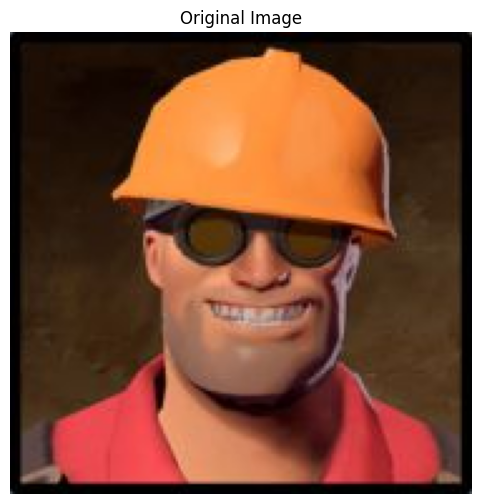

In [ ]:
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

The next step is to Find the centre of the image (𝑦,𝑥) and print the intensity value at the centre

In [ ]:
height, width, _ = image.shape
y_c, x_c = height // 2, width // 2
center_intensity = image[y_c, x_c]
print(f"Center coordinates: ({y_c}, {x_c})")
print(f"Intensity value at center: {center_intensity}")

Center coordinates: (92, 92)
Intensity value at center: [ 67  92 172]


In the next step I added a colour patch at the center


In [ ]:
patch_height = 30
patch_width = 40
top_left_y = y_c - patch_height // 2
top_left_x = x_c - patch_width // 2

In [ ]:
# Convert hex color to BGR (since OpenCV uses BGR)
hex_color = '#329ea8'
rgb_color = tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
bgr_color = rgb_color[::-1]

array([[[82, 77, 74],
        [30, 25, 22],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [24, 26, 27],
        [76, 78, 79]],

       [[36, 31, 28],
        [ 4,  1,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  1,  2],
        [29, 31, 32]],

       [[ 5,  1,  0],
        [ 4,  0,  0],
        [ 4,  0,  0],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  1],
        [ 0,  1,  2]],

       ...,

       [[ 4,  2,  0],
        [ 4,  1,  0],
        [12, 11,  7],
        ...,
        [ 6,  4,  4],
        [ 4,  1,  0],
        [ 5,  2,  0]],

       [[34, 30, 25],
        [ 4,  1,  0],
        [ 7,  6,  2],
        ...,
        [ 5,  2,  0],
        [ 4,  1,  0],
        [39, 35, 30]],

       [[83, 79, 74],
        [26, 23, 18],
        [ 8,  5,  1],
        ...,
        [ 6,  3,  0],
        [25, 21, 16],
        [83, 79, 74]]], dtype=uint8)
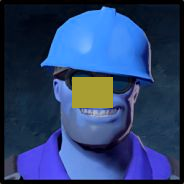

In [ ]:
# Draw the rectangle patch on the image (modifying a copy)
image_with_patch = image.copy()
cv2.rectangle(
    image_with_patch,
    (top_left_x, top_left_y),
    (top_left_x + patch_width, top_left_y + patch_height),
    bgr_color,
    thickness=-1
)

then I print the intensity values at the center of the patch

In [ ]:
patch_center_y = y_c
patch_center_x = x_c
patch_center_intensity = image_with_patch[patch_center_y, patch_center_x]
print(f"Center intensity after patch (BGR): {patch_center_intensity}")
# Convert patched image to RGB for displaying
image_with_patch_rgb = cv2.cvtColor(image_with_patch, cv2.COLOR_BGR2RGB)

Center intensity after patch (BGR): [168 158  50]


Lastly I print the image with the patch inside

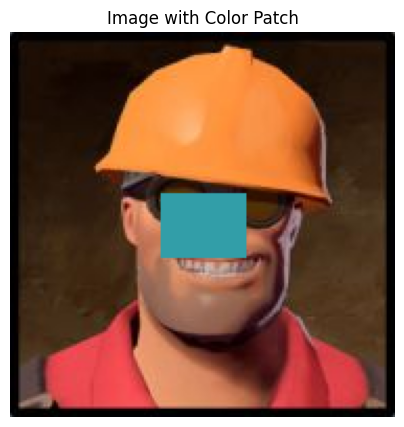

In [ ]:
plt.figure(figsize=(5, 5))
plt.title("Image with Color Patch")
plt.imshow(image_with_patch_rgb)
plt.axis('off')
plt.show()